In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas

import sys
sys.path.append("./modules")
from modules.Plot import setup_rc_params
setup_rc_params()

from modules import Potential, FOM, ROM
from ROM import apply_range_factor

In [3]:
np.random.seed(12345)

In [4]:
n = 1000
r = np.linspace(0, 12, n)

l = ll = j = 0
S = 0

# energy = 50.  # MeV
energies = [50, 100]

param_pts = 900
# param_pts = 100
ignore_error_bounds = False

In [5]:
minnesota_potential = Potential.Potential("minnesota", r, 
                                          l=l, ll=ll, j=j, S=S)
# minnesota_what_to_vary = apply_range_factor(minnesota_potential.default_theta, 0.5)

# minnesota_solver_50 = FOM.MatrixNumerov_ab(minnesota_potential, energy=energies[0])
# minnesota_solver_100 = FOM.MatrixNumerov_ab(minnesota_potential, energy=energies[1])
minnesota_solver_50 = FOM.MatrixNumerovSolver(minnesota_potential, energy=energies[0])
minnesota_solver_100 = FOM.MatrixNumerovSolver(minnesota_potential, energy=energies[1])

/Users/joshuamaldonado/Documents/GitHub/cs_greedy_emulator_josh/modules/SpecialFunctions.py:56: RuntimeWarning: invalid value encountered in multiply
  riccati_bessel_G = -rho * spherical_yn(l, rho)


In [6]:
minnesota_what_to_vary = {"V_s": [-200, 0]}

snapshot_parameters = [{"V_s": -200}, {"V_s": 0}]
# snapshot_parameters = [{"V_s": -130}, {"V_s": -45}]

minnesota_LSPGROM_50_emulator = ROM.Emulator(minnesota_what_to_vary, 
                                             minnesota_solver_50,
                                             sampling_method="linear",
                                             snapshot_parameters=snapshot_parameters,
                                             param_pts=param_pts,
                                             snapshot_max=4, 
                                             use_practically=False,  # get the projections for the G-ROM and the LSPG-ROM
                                             ignore_error_bounds=ignore_error_bounds,
                                             use_scaled_estimated_error=True,
                                             emulation_method="LSPG-ROM", 
                                             error_estimation_method="LSPG-ROM",
                                             use_einsum_paths=False,
                                             orth_cutoff=1e-12,
                                             cutoff_accuracy=1e-6,
                                             verbose=False)
minnesota_LSPGROM_50_emulator.train()


minnesota_GROM_50_emulator = ROM.Emulator(minnesota_what_to_vary, 
                                          minnesota_solver_50,
                                          sampling_method="linear",
                                          snapshot_parameters=snapshot_parameters,
                                          param_pts=param_pts,
                                          snapshot_max=4, 
                                          use_practically=False,  # get the projections for the G-ROM and the LSPG-ROM
                                          ignore_error_bounds=ignore_error_bounds,
                                          use_scaled_estimated_error=True,
                                          emulation_method="G-ROM", 
                                          error_estimation_method="G-ROM",
                                          use_einsum_paths=False,
                                          orth_cutoff=1e-12,
                                          cutoff_accuracy=1e-6,
                                          verbose=False)
minnesota_GROM_50_emulator.train()

/Users/joshuamaldonado/Documents/GitHub/cs_greedy_emulator_josh/modules/GramSchmidt.py:80: NumbaPerformanceWarning: np.vdot() is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  orthogonal_matrix[:, k] -= np.vdot(orthonormal_matrix[:, j],


### setup some figure parameters for consistency

In [7]:
save_location = "./Figures/"

dpi = 600
figsize = (7, 5)

title_size = 20
axis_size = 18
legend_size = 16

linewidth = 3

FOM_alpha = 0.6
ROM_alpha = 0.6

GROM_color = "cornflowerblue"
LSPGROM_color = "orange"

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

# First let's look at an emulator for the Minnesota potential

In [8]:
# space = minnesota_LSPGROM_50_emulator.parameter_space["V_s"]
# element = "S_l"

# fig, ax = plt.subplots(2, 1, dpi=100, figsize=(figsize[0], figsize[1] * 2))
# for i in np.arange(minnesota_LSPGROM_50_emulator.snapshot_max):
#     S_l_LSPG_emulated = minnesota_LSPGROM_50_emulator.emulated_elements[element][i, :]
#     S_l_GROM_emulated = minnesota_GROM_50_emulator.emulated_elements[element][i, :]
#     S_l_exact = minnesota_LSPGROM_50_emulator.exact_elements[element]
    
#     # ax[0].plot(space, S_l_LSPG_emulated.real, color="purple")
#     # ax[0].plot(space, S_l_GROM_emulated.real, color="green")
#     # ax[1].plot(space, np.abs(S_l_LSPG_emulated.real - S_l_exact.real), color="purple")
#     # ax[1].plot(space, np.abs(S_l_GROM_emulated.real - S_l_exact.real), color="green")
#     ax[0].plot(space, S_l_LSPG_emulated.real, color="purple")
#     ax[0].plot(space, S_l_LSPG_emulated.imag, color="purple", linestyle="--")
#     ax[0].plot(space, S_l_GROM_emulated.real, color="green")
#     ax[0].plot(space, S_l_GROM_emulated.imag, color="green", linestyle="--")
    
#     ax[1].plot(space, np.abs(S_l_LSPG_emulated - S_l_exact), color="purple")
#     ax[1].plot(space, np.abs(S_l_GROM_emulated - S_l_exact), color="green")
#     ax[1].set_yscale("log")
# #

# ax[0].plot(space, S_l_exact.real, color="orange", linestyle="-")
# ax[0].plot(space, S_l_exact.imag, color="orange", linestyle="--")
# # ax[0].plot(space, np.abs(S_l_exact), color="orange", linestyle="--")
# ax[1].set_ylim(1e-10, 1e1)
# plt.show()

In [9]:
# # from Matching

# space = minnesota_LSPGROM_50_emulator.parameter_space["V_s"]
# element = "delta_l"

# fig, ax = plt.subplots(2, 1, dpi=100, figsize=(figsize[0], figsize[1] * 2))
# # for i in np.arange(minnesota_LSPGROM_50_emulator.snapshot_max):

# i = 3
# delta_l_LSPG_emulated = minnesota_LSPGROM_50_emulator.emulated_elements[element][i, :]
# delta_l_GROM_emulated = minnesota_GROM_50_emulator.emulated_elements[element][i, :]
# delta_l_exact = minnesota_LSPGROM_50_emulator.exact_elements[element]
# ax[0].plot(space, delta_l_LSPG_emulated, color="purple")
# ax[0].plot(space, delta_l_GROM_emulated, color="green")

# ax[1].plot(space, minnesota_LSPGROM_50_emulator.propagated_max_phaseshift_errors[i, :], color="red", linewidth=4)
# ax[1].plot(space, minnesota_GROM_50_emulator.propagated_max_phaseshift_errors[i, :], color="red", linewidth=4)

# ax[1].plot(space, np.abs(delta_l_LSPG_emulated - delta_l_exact), color="purple")
# ax[1].plot(space, np.abs(delta_l_GROM_emulated - delta_l_exact), color="green")
# ax[1].set_yscale("log")
# #

# ax[0].plot(space, delta_l_exact, color="orange", linestyle="--")
# ax[0].plot(space, delta_l_exact, color="orange", linestyle="-")
# ax[1].set_ylim(1e-10, 1e4)
# plt.show()


In [10]:
def make_axis_nice(ax, tick_length=2, tick_size=20):
    ax.tick_params(which='minor', length=tick_length)
    ax.tick_params(bottom=True, labelbottom=True,
                    top=True, labeltop=False,
                    right=True, labelright=False,
                    left=True, labelleft=True)
    ax.xaxis.set_tick_params(labelsize=tick_size)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_tick_params(labelsize=tick_size)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_ticks_position('both')

/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_97763/1632125804.py:212: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_97763/1632125804.py:212: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_97763/1632125804.py:212: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_97763/1632125804.py:215: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig(f"{save_location}1D_ROM_plot.png", dpi=dpi)
/var/folders/58/xrmpvhh11mj0pb2kfrznw9qh0000gn/T/ipykernel_97763/1632125804.py:216: UserWarning: AutoMinorLocator does not work on logarithmic scales
  plt.savefig(f"{save_location}1D_ROM_plot.pdf", dpi=dpi)
/Users/joshuamaldonado/Documents/GitHub/cs_greedy_emulator_josh/venv/lib/python3.13/s

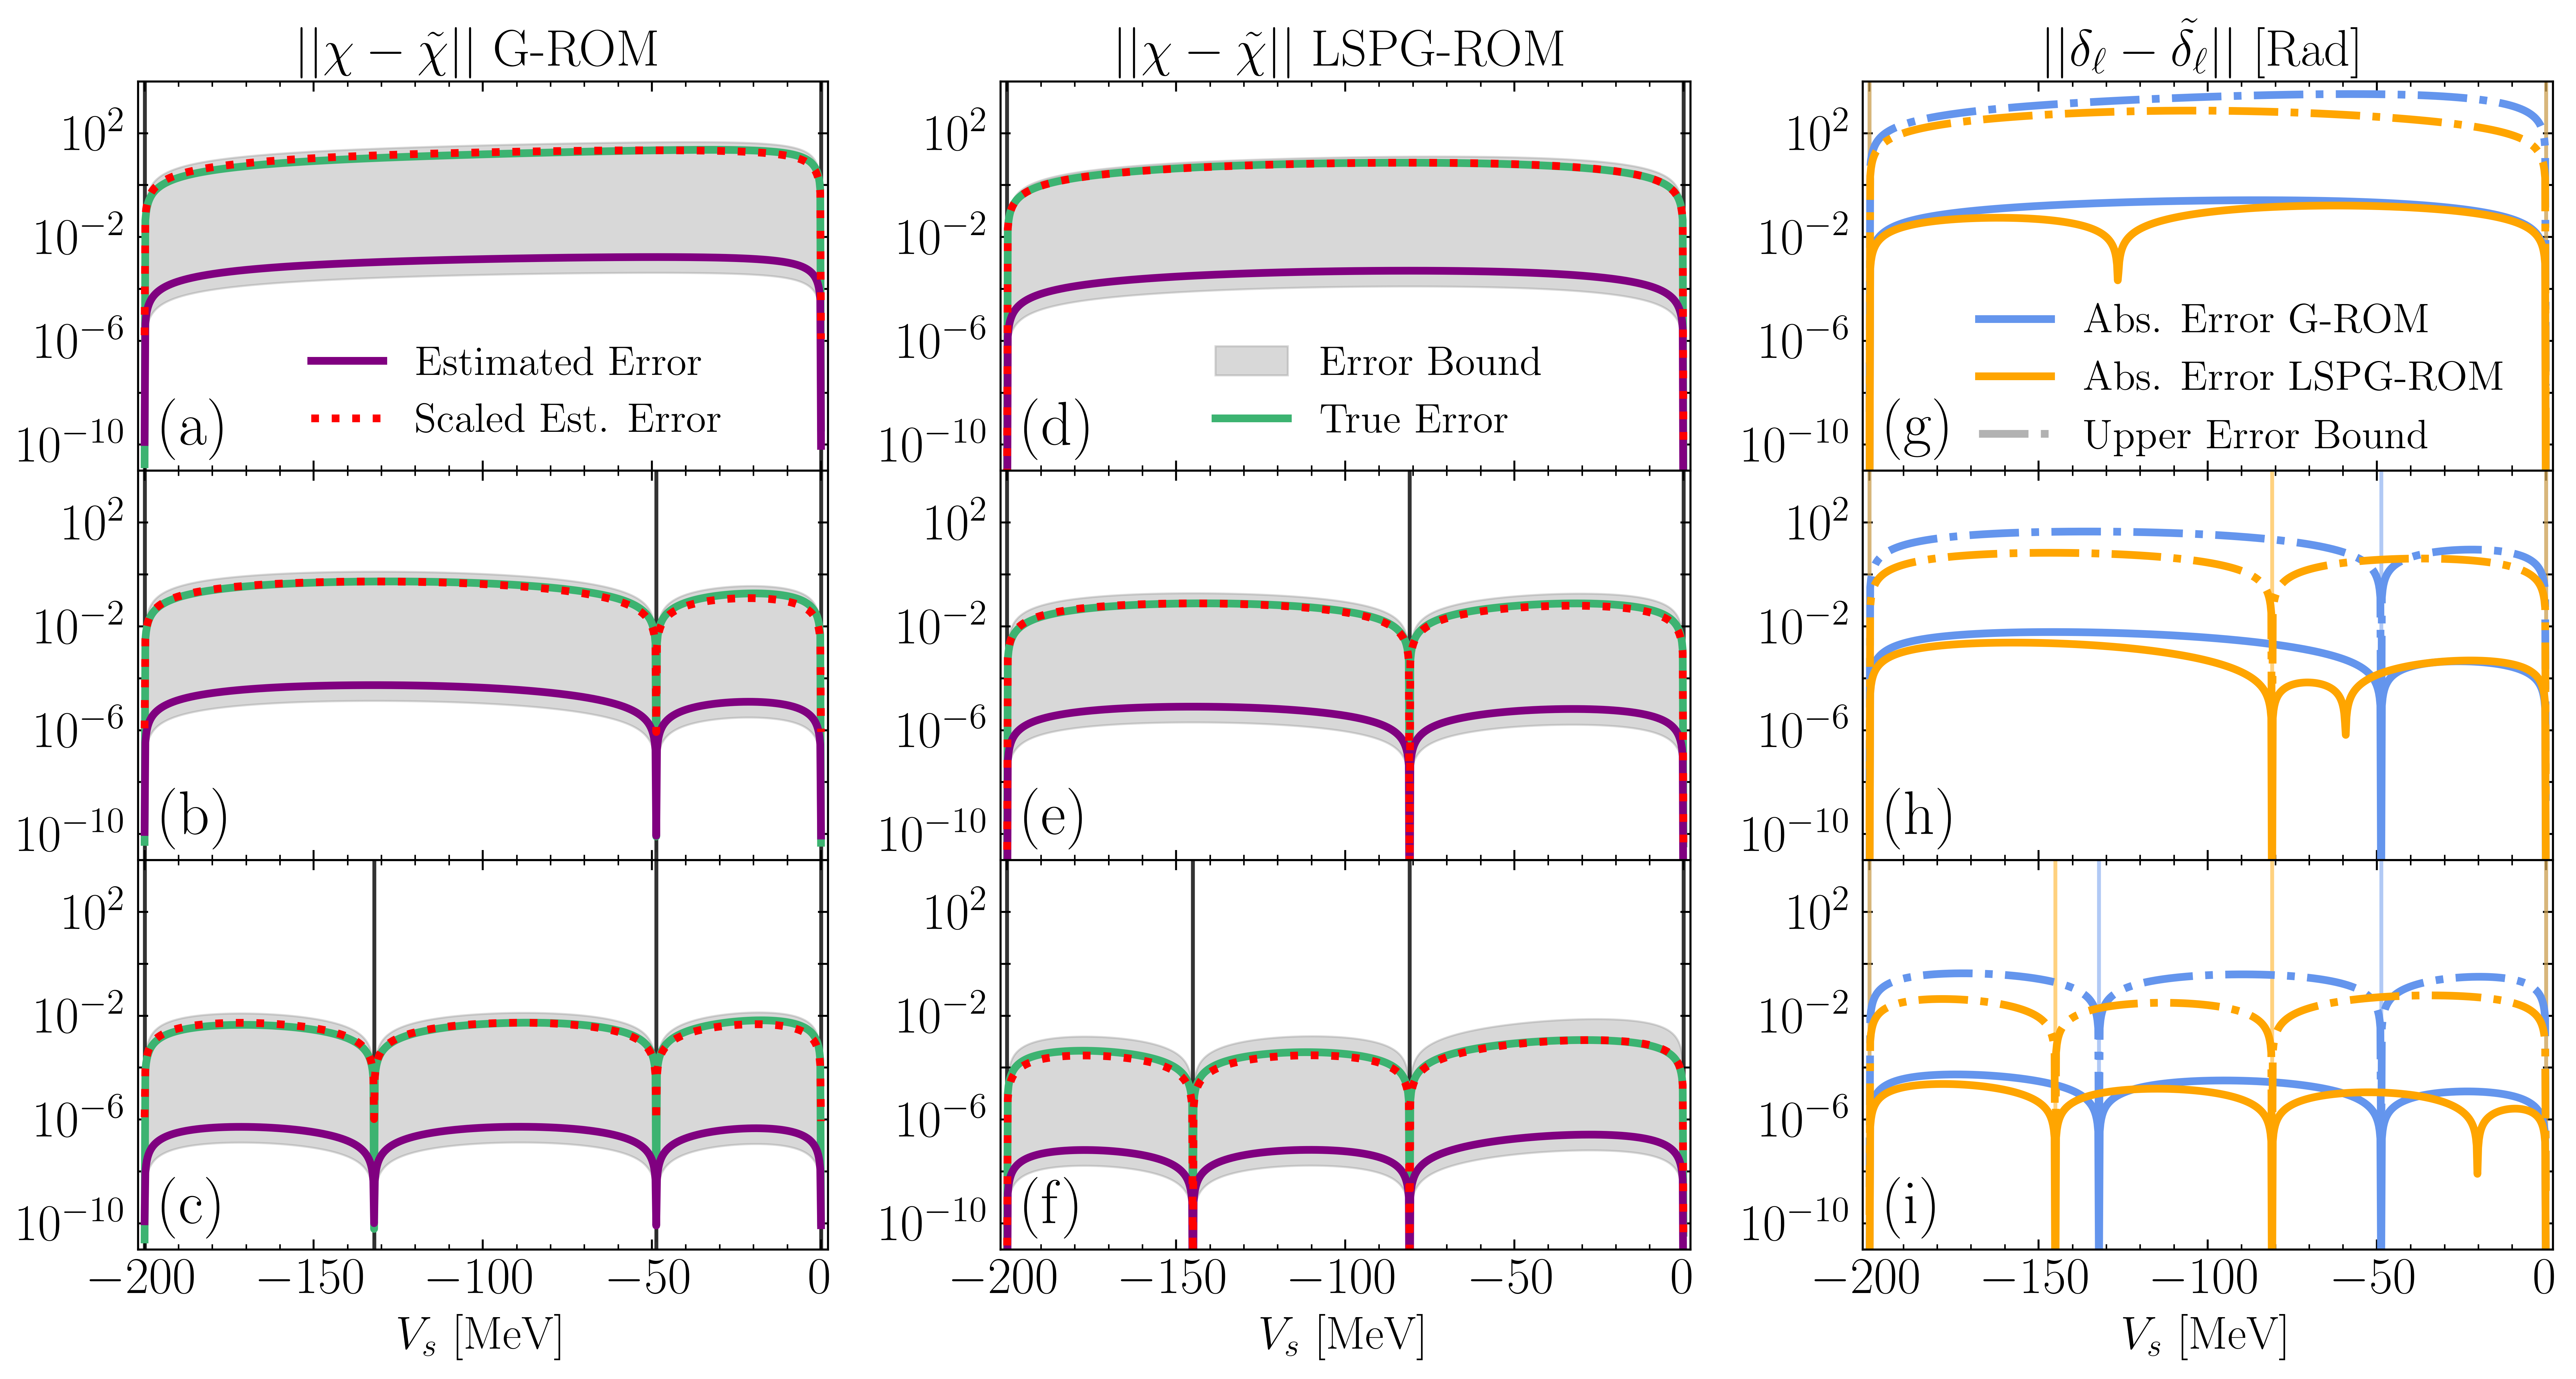

['emulator', 'V_s (MeV)', 'energy', 'l', 'll', 'j', 'S', 'delta_l exact', 'S_l with 2 snapshots', 'exact errors with 2 snapshots', 'estimated errors with 2 snapshots', 'scaled estimated errors with 2 snapshots', 'lower error bound with 2 snapshots', 'upper error bound with 2 snapshots', 'delta_l upper error bound with 2 snapshots', 'S_l with 3 snapshots', 'exact errors with 3 snapshots', 'estimated errors with 3 snapshots', 'scaled estimated errors with 3 snapshots', 'lower error bound with 3 snapshots', 'upper error bound with 3 snapshots', 'delta_l upper error bound with 3 snapshots']
['emulator', 'V_s (MeV)', 'energy', 'l', 'll', 'j', 'S', 'delta_l exact', 'S_l with 2 snapshots', 'exact errors with 2 snapshots', 'estimated errors with 2 snapshots', 'scaled estimated errors with 2 snapshots', 'lower error bound with 2 snapshots', 'upper error bound with 2 snapshots', 'delta_l upper error bound with 2 snapshots', 'S_l with 3 snapshots', 'exact errors with 3 snapshots', 'estimated erro

In [11]:
y_lims = (1e-11, 1e4)
y_lims_2 = (1e-11, 1e4)

space = minnesota_LSPGROM_50_emulator.parameter_space["V_s"]
element = "delta_l"
# element = "K_l"

exact_element = minnesota_LSPGROM_50_emulator.exact_elements[element]

green = "mediumseagreen"

# labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)", "(i)"]
labels = ["(a)", "(d)", "(g)", "(b)", "(e)", "(h)", "(c)", "(f)", "(i)"]
xticks = np.linspace(minnesota_what_to_vary["V_s"][0], minnesota_what_to_vary["V_s"][1], 5)


fig, ax = plt.subplots((5 - 2), 3, dpi=dpi, figsize=(figsize[0] * 2, figsize[1] * 3 / 2))
ax[0, 0].set_title(r"$||\chi - \tilde{\chi}||$ G-ROM", fontsize=title_size)
ax[0, 1].set_title(r"$||\chi - \tilde{\chi}||$ LSPG-ROM", fontsize=title_size)
# ax[0, 2].set_title(r"Re[$S_{\ell}$]", fontsize=title_size)
# ax[0, 2].set_title(r"$K$ Matrix", fontsize=title_size)
ax[0, 2].set_title(r"$||\delta_\ell - \tilde{\delta_\ell}||$ [Rad]", fontsize=title_size)

q = 0
for i, elem in enumerate(np.arange(minnesota_LSPGROM_50_emulator.preset_snapshots - 1, minnesota_LSPGROM_50_emulator.snapshot_max)):
    element_emulated_LSPG = minnesota_LSPGROM_50_emulator.emulated_elements[element][elem, :]# / exact_element
    element_emulated_GROM = minnesota_GROM_50_emulator.emulated_elements[element][elem, :]# / exact_element
    # element_exact = minnesota_LSPGROM_emulator.exact_elements[element].real
    element_exact = minnesota_LSPGROM_50_emulator.exact_elements[element]
    
    exact_errors_LSPG = minnesota_LSPGROM_50_emulator.exact_errors[elem, :]
    exact_errors_GROM = minnesota_GROM_50_emulator.exact_errors[elem, :]
    emulated_errors_LSPG = minnesota_LSPGROM_50_emulator.estimated_errors[elem, :]
    emulated_errors_GROM = minnesota_GROM_50_emulator.estimated_errors[elem, :]
    scaled_emulated_errors_LSPG = minnesota_LSPGROM_50_emulator.scaled_estimated_errors[elem, :]
    scaled_emulated_errors_GROM = minnesota_GROM_50_emulator.scaled_estimated_errors[elem, :]
    lower_error_LSPG = minnesota_LSPGROM_50_emulator.lower_error_bounds[elem, :]
    upper_error_LSPG = minnesota_LSPGROM_50_emulator.upper_error_bounds[elem, :]
    lower_error_GROM = minnesota_GROM_50_emulator.lower_error_bounds[elem, :]
    upper_error_GROM = minnesota_GROM_50_emulator.upper_error_bounds[elem, :]
    
    # G-ROM ([:, 0])
    labeled = False
    for snapshot_parameter in minnesota_GROM_50_emulator.snapshot_parameters[:elem + 1]:
        if not labeled:
            ax[i, 0].axvline(snapshot_parameter["V_s"],
                            alpha=0.8, linewidth=1.5, color="black")#, label="Snapshot Parameter")
            labeled = True
        else:
            ax[i, 0].axvline(snapshot_parameter["V_s"],
                             alpha=0.8, linewidth=1.5, color="black")
    ax[i, 0].fill_between(space, lower_error_GROM, upper_error_GROM, 
                          color="grey", alpha=0.3)#, label="Error Bound")
    ax[i, 0].plot(space, exact_errors_GROM, 
                  color=green, linewidth=linewidth)#, label="Exact Error")
    ax[i, 0].plot(space, emulated_errors_GROM, 
                  color="purple", linewidth=linewidth, label="Estimated Error")
    ax[i, 0].plot(space, scaled_emulated_errors_GROM, 
                  color="red", linewidth=linewidth, linestyle=":", label="Scaled Est. Error")
    
    if i < 2:
        # ax[i, 0].set_xticks([-400, -300, -200, -100, 0], [""]*5)
        ax[i, 0].set_xticks(xticks, [""]*5)
    else:
        # ax[i, 0].set_xticks([-400, -300, -200, -100, 0])
        ax[i, 0].set_xticks(xticks)
    
    ax[i, 0].set_yscale("log")
    # ax[i, 0].set_ylim(1e-10, 1e2)
    ax[i, 0].set_ylim(y_lims)
    
    if i == 0:
        ax[i, 0].set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2], 
                            [r"$10^{-10}$", r"", r"$10^{-6}$", r"", r"$10^{-2}$", r"", r"$10^{2}$"],
                            fontsize=axis_size)
    else:
        ax[i, 0].set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2], 
                            [r"$10^{-10}$", r"", r"$10^{-6}$", r"", r"$10^{-2}$", r"", r"$10^{2}$"],
                            fontsize=axis_size)
    make_axis_nice(ax[i, 0])
    
    
    
    
    # LSPG-ROM ([:, 1])
    labeled = False
    for snapshot_parameter in minnesota_LSPGROM_50_emulator.snapshot_parameters[:elem + 1]:
        if not labeled:
            ax[i, 1].axvline(snapshot_parameter["V_s"],
                            alpha=0.8, linewidth=1.5, color="black")#, label="Snapshot Parameter")
            labeled = True
        else:
            ax[i, 1].axvline(snapshot_parameter["V_s"],
                         alpha=0.8, linewidth=1.5, color="black")
    ax[i, 1].fill_between(space, lower_error_LSPG, upper_error_LSPG, 
                          color="grey", alpha=0.3, label="Error Bound")
    ax[i, 1].plot(space, exact_errors_LSPG, 
                  color=green, linewidth=linewidth, label="True Error")
    ax[i, 1].plot(space, emulated_errors_LSPG, 
                  color="purple", linewidth=linewidth)#, label="Est. Error")
    ax[i, 1].plot(space, scaled_emulated_errors_LSPG, 
                  color="red", linewidth=linewidth, linestyle=":")#, label="Scaled Est. Error")
    
    if i < 2:
        # ax[i, 1].set_xticks([-400, -300, -200, -100, 0], [""]*5)
        ax[i, 1].set_xticks(xticks, [""]*5)
    else:
        # ax[i, 1].set_xticks([-400, -300, -200, -100, 0])
        ax[i, 1].set_xticks(xticks)
    
    ax[i, 1].set_yscale("log")
    # ax[i, 1].set_ylim(1e-10, 1e2)
    ax[i, 1].set_ylim(y_lims)
    if i == 0:
        ax[i, 1].set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2], 
                            [r"$10^{-10}$", r"", r"$10^{-6}$", r"", r"$10^{-2}$", r"", r"$10^{2}$"],
                            fontsize=axis_size)
    else:
        ax[i, 1].set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2], 
                            [r"$10^{-10}$", r"", r"$10^{-6}$", r"", r"$10^{-2}$", r"", r"$10^{2}$"],
                            fontsize=axis_size)
    make_axis_nice(ax[i, 1])
    
    
    
    
    
    # element ([:, 2])
    labeled = True# labeled = False
    for snapshot_parameter in minnesota_GROM_50_emulator.snapshot_parameters[:elem + 1]:
        if not labeled:
            ax[i, 2].axvline(snapshot_parameter["V_s"],
                            alpha=0.5, linewidth=1.5, color=GROM_color, label="G-ROM Snapshot")
            labeled = True
        else:
            ax[i, 2].axvline(snapshot_parameter["V_s"],
                            alpha=0.5, linewidth=1.5, color=GROM_color)
    labeled = True# labeled = False
    for snapshot_parameter in minnesota_LSPGROM_50_emulator.snapshot_parameters[:elem + 1]:
        if not labeled:
            ax[i, 2].axvline(snapshot_parameter["V_s"],
                            alpha=0.5, linewidth=1.5, color=LSPGROM_color, label="LSPG Snapshot")
            labeled = True
        else:
            ax[i, 2].axvline(snapshot_parameter["V_s"],
                            alpha=0.5, linewidth=1.5, color=LSPGROM_color)
    
    ax[i, 2].plot(space, np.abs(element_emulated_GROM - element_exact), 
                  color=GROM_color, linewidth=linewidth, label="Abs. Error G-ROM")
    ax[i, 2].plot(space, minnesota_GROM_50_emulator.propagated_max_phaseshift_errors[i + 1, :], 
                  color=GROM_color, linestyle="-.", linewidth=linewidth)#, label="Upper Bound G-ROM")
    ax[i, 2].plot(space, np.abs(element_emulated_LSPG - element_exact), 
                  color=LSPGROM_color, linewidth=linewidth, label="Abs. Error LSPG-ROM")
    ax[i, 2].plot(space, minnesota_LSPGROM_50_emulator.propagated_max_phaseshift_errors[i + 1, :], 
                  color=LSPGROM_color, linestyle="-.", linewidth=linewidth)#, label="Upper Bound LSPG-ROM")
    
    ax[i, 2].plot(space, minnesota_GROM_50_emulator.propagated_max_phaseshift_errors[i + 1, :] + 1e20, 
                  color="grey", linestyle="-.", alpha=0.6, linewidth=linewidth, label="Upper Error Bound")
    
    if i < 2:
        # ax[i, 2].set_xticks([-400, -300, -200, -100, 0], [""]*5)
        ax[i, 2].set_xticks(xticks, [""]*5)
    else:
        # ax[i, 2].set_xticks([-400, -300, -200, -100, 0])
        ax[i, 2].set_xticks(xticks)
    
    ax[i, 2].set_yscale("log")
    # ax[i, 2].set_ylim(1e-10, 1e2)
    ax[i, 2].set_ylim(y_lims)
    if i == 0:
        ax[i, 2].set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2], 
                            [r"$10^{-10}$", r"", r"$10^{-6}$", r"", r"$10^{-2}$", r"", r"$10^{2}$"],
                            fontsize=axis_size)
    else:
        ax[i, 2].set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2], 
                            [r"$10^{-10}$", r"", r"$10^{-6}$", r"", r"$10^{-2}$", r"", r"$10^{2}$"],
                            fontsize=axis_size)
    make_axis_nice(ax[i, 2])
    #
    
    # x = -390
    # y = 8e-10
    x = -195
    y = 1e-10
    ax[i, 0].text(x, y, labels[q + 0], fontsize=24)
    ax[i, 1].text(x, y, labels[q + 1], fontsize=24)
    ax[i, 2].text(x, y, labels[q + 2], fontsize=24)
    q += 3
    
    ax[i, 0].set_xlim(-200 - 2, 0 + 2)
    ax[i, 1].set_xlim(-200 - 2, 0 + 2)
    ax[i, 2].set_xlim(-200 - 2, 0 + 2)
#


ax[-1, 0].set_xlabel(r"$V_s$ [MeV]", fontsize=axis_size)
ax[-1, 1].set_xlabel(r"$V_s$ [MeV]", fontsize=axis_size)
ax[-1, 2].set_xlabel(r"$V_s$ [MeV]", fontsize=axis_size)

# ax[0, 2].set_ylabel(r"Relative Error [Rad]", fontsize=axis_size)
# ax[1, 2].set_ylabel(r"Relative Error [Rad]", fontsize=axis_size)
# ax[2, 2].set_ylabel(r"Relative Error [Rad]", fontsize=axis_size)

ax[0, 0].legend(fontsize=legend_size, framealpha=0, loc="lower center", 
                bbox_to_anchor=(0.55, -0.05), handlelength=1.75)
ax[0, 1].legend(fontsize=legend_size, framealpha=0, loc="lower center", 
                bbox_to_anchor=(0.55, -0.05), handlelength=1.75)
ax[0, 2].legend(fontsize=legend_size, framealpha=0, loc="lower center", 
                bbox_to_anchor=(0.55, -0.09), handlelength=1.75)
                # bbox_to_anchor=(0.84, 0.79), bbox_transform=fig.transFigure)

plt.tight_layout()
plt.subplots_adjust(hspace=0, wspace=0.25)

plt.savefig(f"{save_location}1D_ROM_plot.png", dpi=dpi)
plt.savefig(f"{save_location}1D_ROM_plot.pdf", dpi=dpi)
plt.show()


# don't forget to save the data for this plot
emulators = ["GROM", "LSPGROM"]
energies = [50]
for emulator in emulators:
    for energy in energies:
        error_data = dict()
        error_data["emulator"] = emulator
        error_data["V_s (MeV)"] = space
        error_data["energy"] = int(energy)
        error_data["l"] = l
        error_data["ll"] = ll
        error_data["j"] = j
        error_data["S"] = S
        error_data["delta_l exact"] = eval(f"minnesota_{emulator}_50_emulator.exact_elements[\"delta_l\"]")
        for i, elem in enumerate(np.arange(minnesota_LSPGROM_50_emulator.preset_snapshots, minnesota_LSPGROM_50_emulator.snapshot_max)):
            # print(i, elem)
            error_data[f"S_l with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.emulated_elements[\"delta_l\"][elem, :]")
            error_data[f"exact errors with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.exact_errors[elem, :]")
            error_data[f"estimated errors with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.estimated_errors[elem, :]")
            error_data[f"scaled estimated errors with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.scaled_estimated_errors[elem, :]")
            try:
                error_data[f"lower error bound with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.lower_error_bounds[elem, :]")
                error_data[f"upper error bound with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.upper_error_bounds[elem, :]")
            except:
                None
            
            error_data[f"delta_l upper error bound with {elem} snapshots"] = eval(f"minnesota_{emulator}_50_emulator.propagated_max_phaseshift_errors[elem, :]")
        #
        print(list(error_data.keys()))
        pandas.DataFrame.from_dict(data=error_data, orient="columns").to_csv(f"{save_location}minnesota_{emulator}_{energy}MeV_data.csv", header=True)
    #
#



In [12]:
# plt.figure(dpi=200)
# plt.title(r"Visualizing the $K$ matrix over snapshots", fontsize=24)

# plt.plot(space, np.abs(minnesota_GROM_50_emulator.exact_elements["K_l"]), color="black", label=r"exact $K_\ell$", linewidth=4)

# for i in np.arange(1, 4):
#     plt.plot(space, np.abs(minnesota_GROM_50_emulator.emulated_elements["K_l"][i, :]), 
#              color=GROM_color, linestyle=(0, (i, i)), label=rf"({i+1}) G-ROM $K_\ell$")
#     plt.plot(space, np.abs(minnesota_LSPGROM_50_emulator.emulated_elements["K_l"][i, :]), 
#              color=LSPGROM_color, linestyle=(0, (i, i)), label=rf"({i+1}) LSPG-ROM $K_\ell$")

# plt.xlabel(r"$V_s$", fontsize=20)
# plt.ylabel(r"$K_\ell$", fontsize=20)
# plt.yscale("log")
# plt.legend()
# plt.show()

In [13]:
# # make a POD basis


# POD_snapshots_nonorth = []
# number_of_snapshots_to_pod = 20
# indices = np.random.randint(0, param_pts, number_of_snapshots_to_pod)
# POD_parameters = minnesota_GROM_50_emulator.parameter_space["V_s"][indices]

# for i, Vs in enumerate(POD_parameters):
#     chi = minnesota_solver_50.solve({"V_s": Vs})
#     POD_snapshots_nonorth.append(chi)

# POD_snapshots = scipy.linalg.orth(np.transpose(POD_snapshots_nonorth))
# POD_basis = POD_snapshots[:, :4]

# # now let's shove this into an emulator class (for convenience)
# POD_50_emulator = ROM.Emulator({"V_s": [-400, 0]}, 
#                             minnesota_solver_50,
#                             sampling_method="linear",
#                             # snapshot_parameters=snapshot_parameters,
#                             param_pts=param_pts,
#                             snapshot_max=4, 
#                             use_practically=False,  # get the projections for the G-ROM and the LSPG-ROM
#                             ignore_error_bounds=ignore_error_bounds,
#                             use_scaled_estimated_error=True,
#                             emulation_method="LSPG-ROM", 
#                             error_estimation_method="LSPG-ROM",
#                             use_einsum_paths=False,
#                             orth_cutoff=1e-12,
#                             cutoff_accuracy=1e-6,
#                             verbose=True)
# POD_50_emulator.snapshots = POD_basis
# POD_50_emulator.dagger_snapshots = POD_basis.T
# POD_50_emulator.truncated_snapshots = POD_basis[2:, :]
# POD_50_emulator.truncated_dagger_snapshots = POD_basis[2:, :].T
# POD_50_emulator.offline_projections(4)



# POD_snapshots_nonorth = []
# number_of_snapshots_to_pod = 20
# indices = np.random.randint(0, param_pts, number_of_snapshots_to_pod)
# POD_parameters = minnesota_GROM_100_emulator.parameter_space["V_s"][indices]

# for i, Vs in enumerate(POD_parameters):
#     chi = minnesota_solver_100.solve({"V_s": Vs})
#     POD_snapshots_nonorth.append(chi)

# POD_snapshots = scipy.linalg.orth(np.transpose(POD_snapshots_nonorth))
# POD_basis = POD_snapshots[:, :4]

# # now let's shove this into an emulator class (for convenience)
# POD_100_emulator = ROM.Emulator({"V_s": [-400, 0]}, 
#                                 minnesota_solver_100,
#                                 sampling_method="linear",
#                                 # snapshot_parameters=snapshot_parameters,
#                                 param_pts=param_pts,
#                                 snapshot_max=4, 
#                                 use_practically=False,  # get the projections for the G-ROM and the LSPG-ROM
#                                 ignore_error_bounds=ignore_error_bounds,
#                                 use_scaled_estimated_error=True,
#                                 emulation_method="LSPG-ROM", 
#                                 error_estimation_method="LSPG-ROM",
#                                 use_einsum_paths=False,
#                                 orth_cutoff=1e-12,
#                                 cutoff_accuracy=1e-6,
#                                 verbose=True)
# POD_100_emulator.snapshots = POD_basis
# POD_100_emulator.dagger_snapshots = POD_basis.T
# POD_100_emulator.truncated_snapshots = POD_basis[2:, :]
# POD_100_emulator.truncated_dagger_snapshots = POD_basis[2:, :].T
# POD_100_emulator.offline_projections(4)

In [14]:
# # import matplotlib.gridspec as gridspec
# # gs = gridspec.GridSpec(2, 2)

# # x_buffer = 4
# # scaling = 5
# # ylims = (-0.7, 0.7)

# # FOM_color = "black"
# # GROM_color = "cornflowerblue"
# # # LSPGROM_color = "limegreen"
# # LSPGROM_color = "orange"

# # snapshot_alpha = 0.6
# # FOM_alpha = 1.0
# # ROM_alpha = 1.0

# # # fig, ax = plt.subplots(2, 2, dpi=dpi, figsize=(7*2, 5*2))
# # fig = plt.figure(dpi=dpi, figsize=(7*2, 5*2))

# # # plt.suptitle("Comparing G-ROM and LSPG Emulated Wave Functions at Best-Fit $^3P_0$ Chiral Parameters", x=.51, y=0.94, fontsize=18)

# # # [:, 0] index for G-ROM
# # # [:, 1] index for LSPG
# # theta = {"V_r": 200., "V_s": -91.85}

# # j = 0  # G-ROM first

# # ax1 = fig.add_subplot(gs[0, 0])
# # ax1.set_title("G-ROM Emulator", fontsize=24)


# # ax1.plot(r, minnesota_GROM_emulator.FOM(theta)[:-2], 
# #          color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# # ax1.plot(r, minnesota_GROM_emulator.emulate(theta)[:-2], 
# #          color=GROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="G-ROM", zorder=3)
# # ax1.plot(r, 100 + minnesota_GROM_emulator.snapshots[:-2, 0], 
# #          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# # ax1.plot(r, scaling * minnesota_GROM_emulator.snapshots[:-2, :], 
# #          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# # ax1.set_xlabel("$r$ (fm)", fontsize=22)
# # ax1.set_xlim(0, 10)
# # ax1.set_ylabel(r"$\chi(r)$", fontsize=22)
# # ax1.set_ylim(ylims)
# # ax1.legend(loc="lower right", fontsize=20, markerfirst=False, framealpha=0, ncol=3)#, handlelength=1)
# # ax1.xaxis.set_tick_params(labelsize=20)
# # ax1.yaxis.set_tick_params(labelsize=20)



# # j = 1  # next is LSPG
# # ax2 = fig.add_subplot(gs[0, 1])
# # ax2.set_title("LSPG-ROM Emulator", fontsize=24)

# # ax2.plot(r, minnesota_LSPGROM_emulator.FOM(theta)[:-2], 
# #          color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# # ax2.plot(r, minnesota_LSPGROM_emulator.emulate(theta)[:-2], 
# #          color=LSPGROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG", zorder=3)
# # ax2.plot(r, 100 + minnesota_LSPGROM_emulator.snapshots[:-2, 0], 
# #          color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# # ax2.plot(r, scaling * minnesota_LSPGROM_emulator.snapshots[:-2, :], 
# #          color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# # ax2.set_xlabel("$r$ (fm)", fontsize=22)
# # ax2.set_xlim(0, 10)
# # ax2.set_ylabel(r"$\chi(r)$", fontsize=22)
# # ax2.set_ylim(ylims)
# # ax2.legend(loc="lower right", fontsize=20, markerfirst=False, framealpha=0, ncol=3)#, handlelength=1)
# # ax2.xaxis.set_tick_params(labelsize=20)
# # ax2.yaxis.set_tick_params(labelsize=20)
# # ax3 = fig.add_subplot(gs[1, :])

# # ax3.plot(r, np.abs(minnesota_GROM_emulator.FOM(theta)[:-2] - minnesota_GROM_emulator.emulate(theta)[:-2]), 
# #          color=GROM_color, linewidth=4, label="Error in G-ROM")
# # ax3.plot(r, np.abs(minnesota_LSPGROM_emulator.FOM(theta)[:-2] - minnesota_LSPGROM_emulator.emulate(theta)[:-2]), 
# #          color=LSPGROM_color, linewidth=4, label="Error in LSPG-ROM")


# # ax3.set_xlim(0, 10)
# # ax3.set_xlabel(r"$r$ (fm)", fontsize=26)
# # # ax3.set_ylabel(r"$|\chi(r) - \tilde{\chi}(r)|$", fontsize=22)
# # ax3.set_ylabel(r"Absolute Error", fontsize=26)
# # ax3.set_yscale("log")
# # ax3.set_ylim(1e-8, 3e-3)
# # ax3.xaxis.set_tick_params(labelsize=20)
# # ax3.yaxis.set_tick_params(labelsize=20)
# # ax3.legend(framealpha=0, fontsize=20)


# # plt.tight_layout()
# # # plt.subplots_adjust(hspace=0.0, wspace=0.001)
# # plt.savefig(f"{save_location}minnesota_emulator_result.png", dpi=dpi)
# # plt.savefig(f"{save_location}minnesota_emulator_result.pdf", dpi=dpi)
# # plt.show()


# # # don't forget to save the data for this plot
# # emulators = ["G-ROM", "LSPG-ROM"]
# # for emulator in emulators:
# #     error_data = dict()
# #     error_data["emulator"] = emulator
# #     error_data["V_s (MeV)"] = space
# #     error_data["energy"] = int(energy)
# #     error_data["l"] = l
# #     error_data["ll"] = ll
# #     error_data["j"] = j
# #     error_data["S"] = S
# #     error_data["S_l exact"] = minnesota_LSPGROM_emulator.exact_elements[element]
    
# #     # error_data["snapshot 1"] = minnesota_GROM_emulator.snapshots[:, 0]
# #     # error_data["snapshot 2"] = minnesota_GROM_emulator.snapshots[:, 1]
# #     # error_data["snapshot 3"] = minnesota_GROM_emulator.snapshots[:, 2]
# #     # error_data["snapshot 4"] = minnesota_GROM_emulator.snapshots[:, 3]
# #     # error_data["FOM"] = minnesota_GROM_emulator.FOM(theta)
# #     # error_data["G-ROM"] = minnesota_GROM_emulator.emulate(theta, emulation_method="G-ROM")
# #     # error_data["LSPG-ROM"] = minnesota_GROM_emulator.emulate(theta, emulation_method="LSPG-ROM")
# #     #
# #     print(list(error_data.keys()))
# #     pandas.DataFrame.from_dict(data=error_data, orient="columns").to_csv(f"{save_location}minnesota_{emulator}_{energy}MeV_data.csv", header=True)
# # #


# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(2, 3)

# x_buffer = 4
# scaling = 5
# ylims = (-0.7, 0.7)

# FOM_color = "black"
# GROM_color = "cornflowerblue"
# # LSPGROM_color = "limegreen"
# LSPGROM_color = "orange"
# POD_color = "limegreen"

# snapshot_alpha = 0.6
# FOM_alpha = 1.0
# ROM_alpha = 1.0

# # fig, ax = plt.subplots(2, 2, dpi=dpi, figsize=(7*2, 5*2))
# fig = plt.figure(dpi=dpi, figsize=(7*3, 5*2))

# # plt.suptitle("Comparing G-ROM and LSPG Emulated Wave Functions at Best-Fit $^3P_0$ Chiral Parameters", x=.51, y=0.94, fontsize=18)

# # [:, 0] index for G-ROM
# # [:, 1] index for LSPG
# theta = {"V_r": 200., "V_s": -91.85}

# # j = 0  # G-ROM first
# ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_title("G-ROM Emulator", fontsize=24)


# ax1.plot(r, minnesota_GROM_50_emulator.FOM(theta)[:-2], 
#          color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# ax1.plot(r, minnesota_GROM_50_emulator.emulate(theta)[:-2], 
#          color=GROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="G-ROM", zorder=3)
# ax1.plot(r, 100 + minnesota_GROM_50_emulator.snapshots[:-2, 0], 
#          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax1.plot(r, scaling * minnesota_GROM_50_emulator.snapshots[:-2, :], 
#          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax1.set_xlabel("$r$ (fm)", fontsize=22)
# ax1.set_xlim(0, 10)
# ax1.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax1.set_ylim(ylims)
# ax1.legend(loc="lower right", fontsize=20, markerfirst=False, framealpha=0, ncol=3)#, handlelength=1)
# ax1.xaxis.set_tick_params(labelsize=20)
# ax1.yaxis.set_tick_params(labelsize=20)



# # j = 1  # next is LSPG
# ax2 = fig.add_subplot(gs[0, 1])
# ax2.set_title("LSPG-ROM Emulator", fontsize=24)

# ax2.plot(r, minnesota_LSPGROM_50_emulator.FOM(theta)[:-2], 
#          color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# ax2.plot(r, minnesota_LSPGROM_50_emulator.emulate(theta)[:-2], 
#          color=LSPGROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG", zorder=3)
# ax2.plot(r, 100 + minnesota_LSPGROM_50_emulator.snapshots[:-2, 0], 
#          color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax2.plot(r, scaling * minnesota_LSPGROM_50_emulator.snapshots[:-2, :], 
#          color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)


# ax2.set_xlabel("$r$ (fm)", fontsize=22)
# ax2.set_xlim(0, 10)
# ax2.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax2.set_ylim(ylims)
# ax2.legend(loc="lower right", fontsize=20, markerfirst=False, framealpha=0, ncol=3)#, handlelength=1)
# ax2.xaxis.set_tick_params(labelsize=20)
# ax2.yaxis.set_tick_params(labelsize=20)

# # j = 2  # next is LSPG
# ax3 = fig.add_subplot(gs[0, 2])
# ax3.set_title("POD Emulator", fontsize=24)

# ax3.plot(r, POD_50_emulator.FOM(theta)[:-2], 
#          color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# ax3.plot(r, POD_50_emulator.emulate(theta)[:-2], 
#          color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG", zorder=3)
# ax3.plot(r, 100 + POD_50_emulator.snapshots[:-2, 0], 
#          color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax3.plot(r, scaling * POD_50_emulator.snapshots[:-2, :], 
#          color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax3.set_xlabel("$r$ (fm)", fontsize=22)
# ax3.set_xlim(0, 10)
# ax3.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax3.set_ylim(ylims)
# ax3.legend(loc="lower right", fontsize=20, markerfirst=False, framealpha=0, ncol=3)#, handlelength=1)
# ax3.xaxis.set_tick_params(labelsize=20)
# ax3.yaxis.set_tick_params(labelsize=20)


# ax4 = fig.add_subplot(gs[1, :])

# ax4.plot(r, np.abs(minnesota_GROM_50_emulator.FOM(theta)[:-2] - minnesota_GROM_50_emulator.emulate(theta)[:-2]), 
#          color=GROM_color, linewidth=4, label="Error in G-ROM")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - minnesota_LSPGROM_50_emulator.emulate(theta)[:-2]), 
#          color=LSPGROM_color, linewidth=4, label="Error in LSPG-ROM")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - POD_50_emulator.emulate(theta, emulation_method="G-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD G-ROM", linestyle=":")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - POD_50_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in PODLSPG-ROM", linestyle="--")


# ax4.set_xlim(0, 10)
# ax4.set_xlabel(r"$r$ (fm)", fontsize=26)
# # ax3.set_ylabel(r"$|\chi(r) - \tilde{\chi}(r)|$", fontsize=22)
# ax4.set_ylabel(r"Absolute Error", fontsize=26)
# ax4.set_yscale("log")
# ax4.set_ylim(1e-8, 3e-3)
# ax4.xaxis.set_tick_params(labelsize=20)
# ax4.yaxis.set_tick_params(labelsize=20)
# ax4.legend(framealpha=0, fontsize=20, ncol=2)


# ax1.text(7.5, 0.5, "50 MeV", fontsize=axis_size * 1.5)
# ax1.text(9.0, 0.35, "(a)", fontsize=axis_size * 1.5)
# ax2.text(7.5, 0.5, "50 MeV", fontsize=axis_size * 1.5)
# ax2.text(9.0, 0.35, "(b)", fontsize=axis_size * 1.5)
# ax3.text(7.5, 0.5, "50 MeV", fontsize=axis_size * 1.5)
# ax3.text(9.0, 0.35, "(c)", fontsize=axis_size * 1.5)
# ax4.text(1, 5e-7, "50 MeV", fontsize=axis_size * 1.5)
# ax4.text(1, 1e-7, "(d)", fontsize=axis_size * 1.5)



# plt.tight_layout()
# # plt.subplots_adjust(hspace=0.0, wspace=0.001)
# plt.savefig(f"{save_location}minnesota_emulator_result.png", dpi=dpi)
# plt.savefig(f"{save_location}minnesota_emulator_result.pdf", dpi=dpi)
# plt.show()


# # don't forget to save the data for this plot
# emulators = ["G-ROM", "LSPG-ROM"]
# for emulator in emulators:
#     error_data = dict()
#     error_data["emulator"] = emulator
#     error_data["V_s (MeV)"] = space
#     error_data["energy"] = int(energy)
#     error_data["l"] = l
#     error_data["ll"] = ll
#     error_data["j"] = j
#     error_data["S"] = S
#     error_data["S_l exact"] = minnesota_LSPGROM_50_emulator.exact_elements[element]
    
#     error_data["snapshot 1"] = minnesota_GROM_emulator.snapshots[:, 0]
#     # error_data["snapshot 2"] = minnesota_GROM_emulator.snapshots[:, 1]
#     # error_data["snapshot 3"] = minnesota_GROM_emulator.snapshots[:, 2]
#     # error_data["snapshot 4"] = minnesota_GROM_emulator.snapshots[:, 3]
#     # error_data["FOM"] = minnesota_GROM_emulator.FOM(theta)
#     # error_data["G-ROM"] = minnesota_GROM_emulator.emulate(theta, emulation_method="G-ROM")
#     # error_data["LSPG-ROM"] = minnesota_GROM_emulator.emulate(theta, emulation_method="LSPG-ROM")
#     #
#     print(list(error_data.keys()))
#     pandas.DataFrame.from_dict(data=error_data, orient="columns").to_csv(f"{save_location}minnesota_{emulator}_{energy}MeV_data.csv", header=True)
# #



In [15]:
# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(4 + 1, 3, height_ratios=[1, 1, 0.005, 1, 1])  # extra for spacing

# x_buffer = 4
# scaling = 5
# ylims = (-0.83, 0.83)

# tick_size = 26

# FOM_color = "black"
# GROM_color = "cornflowerblue"
# # LSPGROM_color = "limegreen"
# LSPGROM_color = "orange"
# POD_color = "hotpink"
# # POD_color = "yellowgreen"
# # POD_color = "fuchsia"

# snapshot_alpha = 0.6
# FOM_alpha = 1.0
# ROM_alpha = 1.0

# # fig, ax = plt.subplots(2, 2, dpi=dpi, figsize=(7*2, 5*2))
# fig = plt.figure(dpi=dpi, figsize=(7*3, 5*4))
# # fig = plt.figure(dpi=dpi, figsize=(7*2, 5*3))

# # plt.suptitle("Comparing G-ROM and LSPG Emulated Wave Functions at Best-Fit $^3P_0$ Chiral Parameters", x=.51, y=0.94, fontsize=18)

# # [:, 0] index for G-ROM
# # [:, 1] index for LSPG
# theta = {"V_r": 200., "V_s": -91.85}

# # j = 0  # G-ROM first
# ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_title("G-ROM Emulator", fontsize=28)


# fom_1 = ax1.plot(r, minnesota_GROM_50_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_1 = ax1.plot(r, minnesota_GROM_50_emulator.emulate(theta)[:-2], 
#                  color=GROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="G-ROM", zorder=3)
# X_1 = ax1.plot(r, 100 + minnesota_GROM_50_emulator.snapshots[:-2, 0], 
#                color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax1.plot(r, scaling * minnesota_GROM_50_emulator.snapshots[:-2, :], 
#          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax1.set_xlabel("$r$ (fm)", fontsize=22)
# ax1.set_xlim(0, 10)
# ax1.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax1.set_ylim(ylims)
# first_legend = ax1.legend(handles=[fom_1[0], X_1[0]], loc="lower left", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax1.add_artist(first_legend)
# ax1.legend(handles=[rom_1[0]], loc="upper left", fontsize=20, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax1.xaxis.set_tick_params(labelsize=tick_size)
# ax1.yaxis.set_tick_params(labelsize=tick_size)



# # j = 1  # next is LSPG
# ax2 = fig.add_subplot(gs[0, 1])
# ax2.set_title("LSPG-ROM Emulator", fontsize=28)

# fom_2 = ax2.plot(r, minnesota_LSPGROM_50_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_2 = ax2.plot(r, minnesota_LSPGROM_50_emulator.emulate(theta)[:-2], 
#                  color=LSPGROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# X_2 = ax2.plot(r, 100 + minnesota_LSPGROM_50_emulator.snapshots[:-2, 0], 
#                color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax2.plot(r, scaling * minnesota_LSPGROM_50_emulator.snapshots[:-2, :], 
#                color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)


# ax2.set_xlabel("$r$ (fm)", fontsize=22)
# ax2.set_xlim(0, 10)
# ax2.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax2.set_ylim(ylims)
# # ax2.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=3, handlelength=1)
# first_legend = ax2.legend(handles=[fom_2[0], X_2[0]], loc="lower left", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax2.add_artist(first_legend)
# ax2.legend(handles=[rom_2[0]], loc="upper left", fontsize=20, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax2.xaxis.set_tick_params(labelsize=tick_size)
# ax2.yaxis.set_tick_params(labelsize=tick_size)

# # j = 2  # next is LSPG
# ax3 = fig.add_subplot(gs[0, 2])
# ax3.set_title("POD Emulator", fontsize=28)

# fom_3 = ax3.plot(r, POD_50_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom1_3 = ax3.plot(r, POD_50_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2], 
#                   color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# rom2_3 = ax3.plot(r, POD_50_emulator.emulate(theta, emulation_method="G-ROM")[:-2], 
#                   color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (1, 1)), label="G-ROM", zorder=3)
# X_3 = ax3.plot(r, 100 + POD_50_emulator.snapshots[:-2, 0], 
#                color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax3.plot(r, scaling * POD_50_emulator.snapshots[:-2, :], 
#          color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax3.set_xlabel("$r$ (fm)", fontsize=22)
# ax3.set_xlim(0, 10)
# ax3.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax3.set_ylim(ylims)
# # ax3.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# first_legend = ax3.legend(handles=[fom_3[0], X_3[0]], loc="lower left", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax3.add_artist(first_legend)
# ax3.legend(handles=[rom1_3[0], rom2_3[0]], loc="upper left", fontsize=20, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax3.xaxis.set_tick_params(labelsize=tick_size)
# ax3.yaxis.set_tick_params(labelsize=tick_size)


# ax4 = fig.add_subplot(gs[1, :])

# ax4.plot(r, np.abs(minnesota_GROM_50_emulator.FOM(theta)[:-2] - minnesota_GROM_50_emulator.emulate(theta)[:-2]), 
#          color=GROM_color, linewidth=4, label="Error in G-ROM")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - minnesota_LSPGROM_50_emulator.emulate(theta)[:-2]), 
#          color=LSPGROM_color, linewidth=4, label="Error in LSPG-ROM")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - POD_50_emulator.emulate(theta, emulation_method="G-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD G-ROM", linestyle="--")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - POD_50_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD LSPG-ROM", linestyle=":")


# ax4.set_xlim(0, 10)
# ax4.set_xlabel(r"$r$ (fm)", fontsize=26)
# # ax3.set_ylabel(r"$|\chi(r) - \tilde{\chi}(r)|$", fontsize=22)
# ax4.set_ylabel(r"Absolute Error", fontsize=26)
# ax4.set_yscale("log")
# ax4.set_ylim(1e-9, 3e-3)
# ax4.xaxis.set_tick_params(labelsize=tick_size)
# ax4.yaxis.set_tick_params(labelsize=tick_size)
# ax4.legend(framealpha=0, fontsize=20, ncol=4, loc="lower left", bbox_to_anchor=(0.0, -0.05))


# ax1.text(6.5, 0.65, "50 MeV", fontsize=axis_size * 1.5)
# ax1.text(9.0, 0.65, "(a)", fontsize=axis_size * 1.5)
# ax2.text(6.5, 0.65, "50 MeV", fontsize=axis_size * 1.5)
# ax2.text(9.0, 0.65, "(b)", fontsize=axis_size * 1.5)
# ax3.text(6.5, 0.65, "50 MeV", fontsize=axis_size * 1.5)
# ax3.text(9.0, 0.65, "(c)", fontsize=axis_size * 1.5)
# ax4.text(8.75, 6e-9, "50 MeV", fontsize=axis_size * 1.5)
# ax4.text(9.50, 6e-9, "(d)", fontsize=axis_size * 1.5)


# """
# 50 MeV plots above
# 100 MeV plots below
# """
# ax_SPACER = fig.add_subplot(gs[2, :])
# ax_SPACER.axis('off')



# ax5 = fig.add_subplot(gs[3, 0])
# ax5.set_title("G-ROM Emulator", fontsize=28)

# fom_5 = ax5.plot(r, minnesota_GROM_100_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_5 = ax5.plot(r, minnesota_GROM_100_emulator.emulate(theta)[:-2], 
#                  color=GROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="G-ROM", zorder=3)
# X_5 = ax5.plot(r, 100 + minnesota_GROM_100_emulator.snapshots[:-2, 0], 
#                color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax5.plot(r, (scaling - 3) * minnesota_GROM_100_emulator.snapshots[:-2, :], 
#          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax5.set_xlabel("$r$ (fm)", fontsize=22)
# ax5.set_xlim(0, 10)
# ax5.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax5.set_ylim((-0.45, 0.45))
# # ax5.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=3, handlelength=1)
# first_legend = ax5.legend(handles=[fom_5[0], X_5[0]], loc="lower left", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax5.add_artist(first_legend)
# ax5.legend(handles=[rom_5[0]], loc="upper left", fontsize=20, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax5.xaxis.set_tick_params(labelsize=tick_size)
# ax5.yaxis.set_tick_params(labelsize=tick_size)



# # j = 1  # next is LSPG
# ax6 = fig.add_subplot(gs[3, 1])
# ax6.set_title("LSPG-ROM Emulator", fontsize=28)

# fom_6 = ax6.plot(r, minnesota_LSPGROM_100_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_6 = ax6.plot(r, minnesota_LSPGROM_100_emulator.emulate(theta)[:-2], 
#                  color=LSPGROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# X_6 = ax6.plot(r, 100 + minnesota_LSPGROM_100_emulator.snapshots[:-2, 0], 
#                color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax6.plot(r, (scaling - 3) * minnesota_LSPGROM_100_emulator.snapshots[:-2, :], 
#          color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax6.set_xlabel("$r$ (fm)", fontsize=22)
# ax6.set_xlim(0, 10)
# ax6.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax6.set_ylim((-0.45, 0.45))
# # ax6.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=3, handlelength=1)
# first_legend = ax6.legend(handles=[fom_6[0], X_6[0]], loc="lower left", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax6.add_artist(first_legend)
# ax6.legend(handles=[rom_6[0]], loc="upper left", fontsize=20, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax6.xaxis.set_tick_params(labelsize=tick_size)
# ax6.yaxis.set_tick_params(labelsize=tick_size)

# # j = 2  # next is LSPG
# ax7 = fig.add_subplot(gs[3, 2])
# ax7.set_title("POD Emulator", fontsize=28)

# fom_7 = ax7.plot(r, POD_100_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom1_7 = ax7.plot(r, POD_100_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2], 
#                  color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# rom2_7 = ax7.plot(r, POD_100_emulator.emulate(theta, emulation_method="G-ROM")[:-2], 
#                   color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=":", label="G-ROM", zorder=3)
# X_7 = ax7.plot(r, 100 + POD_100_emulator.snapshots[:-2, 0], 
#                color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax7.plot(r, (scaling - 3) * POD_100_emulator.snapshots[:-2, :], 
#          color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax7.set_xlabel("$r$ (fm)", fontsize=22)
# ax7.set_xlim(0, 10)
# ax7.set_ylabel(r"$\chi(r)$", fontsize=22)
# ax7.set_ylim((-0.45, 0.45))
# # ax7.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# first_legend = ax7.legend(handles=[fom_7[0], X_7[0]], loc="lower left", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax7.add_artist(first_legend)
# ax7.legend(handles=[rom1_7[0], rom2_7[0]], loc="upper left", fontsize=20, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax7.xaxis.set_tick_params(labelsize=tick_size)
# ax7.yaxis.set_tick_params(labelsize=tick_size)


# ax8 = fig.add_subplot(gs[4, :])

# ax8.plot(r, np.abs(minnesota_GROM_100_emulator.FOM(theta)[:-2] - minnesota_GROM_100_emulator.emulate(theta)[:-2]), 
#          color=GROM_color, linewidth=4, label="Error in G-ROM")
# ax8.plot(r, np.abs(minnesota_LSPGROM_100_emulator.FOM(theta)[:-2] - minnesota_LSPGROM_100_emulator.emulate(theta)[:-2]), 
#          color=LSPGROM_color, linewidth=4, label="Error in LSPG-ROM")
# ax8.plot(r, np.abs(minnesota_LSPGROM_100_emulator.FOM(theta)[:-2] - POD_100_emulator.emulate(theta, emulation_method="G-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD G-ROM", linestyle="--")
# ax8.plot(r, np.abs(minnesota_LSPGROM_100_emulator.FOM(theta)[:-2] - POD_100_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD LSPG-ROM", linestyle=":")

# ax8.set_xlim(0, 10)
# ax8.set_xlabel(r"$r$ (fm)", fontsize=26)
# # ax3.set_ylabel(r"$|\chi(r) - \tilde{\chi}(r)|$", fontsize=22)
# ax8.set_ylabel(r"Absolute Error", fontsize=26)
# ax8.set_yscale("log")
# ax8.set_ylim(1e-9, 3e-3)
# ax8.xaxis.set_tick_params(labelsize=tick_size)
# ax8.yaxis.set_tick_params(labelsize=tick_size)
# ax8.legend(framealpha=0, fontsize=20, ncol=2, loc="lower left", bbox_to_anchor=(0.0, -0.05))


# ax5.text(6.2, 0.35, "100 MeV", fontsize=axis_size * 1.5)
# ax5.text(9.0, 0.35, "(e)", fontsize=axis_size * 1.5)
# ax6.text(6.2, 0.35, "100 MeV", fontsize=axis_size * 1.5)
# ax6.text(9.0, 0.35, "(f)", fontsize=axis_size * 1.5)
# ax7.text(6.2, 0.35, "100 MeV", fontsize=axis_size * 1.5)
# ax7.text(9.0, 0.35, "(g)", fontsize=axis_size * 1.5)
# ax8.text(8.75, 6e-9, "100 MeV", fontsize=axis_size * 1.5)
# ax8.text(9.50, 6e-9, "(h)", fontsize=axis_size * 1.5)


# for i in np.arange(1, 8 + 1):
#     eval(f"make_axis_nice(ax{i}, tick_length=4, tick_size=tick_size)")


# plt.tight_layout()
# # plt.subplots_adjust(hspace=0.15, wspace=0.15)
# # gs[2].set_height_ratios(hspace=0.5)
# plt.savefig(f"{save_location}minnesota_emulator_result.png", dpi=dpi)
# plt.savefig(f"{save_location}minnesota_emulator_result.pdf", dpi=dpi)
# print("figure saved")
# plt.show()


# # # don't forget to save the data for this plot
# # emulators = ["G-ROM", "LSPG-ROM"]
# # for emulator in emulators:
# #     for energy in energies:
# #         error_data = dict()
# #         error_data["emulator"] = emulator
# #         error_data["V_s (MeV)"] = space
# #         error_data["energy"] = int(energy)
# #         error_data["l"] = l
# #         error_data["ll"] = ll
# #         error_data["j"] = j
# #         error_data["S"] = S
# #         # error_data["S_l exact"] = minnesota_LSPGROM_50_emulator.exact_elements[element]
        
# #         error_data["snapshot 1"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 0]")
# #         error_data["snapshot 2"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 1]")
# #         error_data["snapshot 3"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 2]")
# #         error_data["snapshot 4"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 3]")
# #         error_data["FOM"] = eval(f"minnesota_GROM_{energy}_emulator.FOM(theta)")
# #         error_data["G-ROM"] = eval(f"minnesota_GROM_{energy}_emulator.emulate(theta, emulation_method=\"G-ROM\")")
# #         error_data["LSPG-ROM"] = eval(f"minnesota_GROM_{energy}_emulator.emulate(theta, emulation_method=\"LSPG-ROM\")")
# #         #
# #         print(list(error_data.keys()))
# #         pandas.DataFrame.from_dict(data=error_data, orient="columns").to_csv(f"{save_location}minnesota_{emulator}_{energy}MeV_data.csv", header=True)
# #     #
# # #



In [16]:
# import matplotlib.gridspec as gridspec
# gs = gridspec.GridSpec(4 + 1, 3, height_ratios=[1, 1, 0.005, 1, 1])  # extra for spacing

# x_buffer = 4
# scaling = 5
# ylims = (-0.83, 0.83)

# title_size = 20
# tick_size = 20
# axis_size = 20
# axis_size_2 = 22
# legend_size = 20

# FOM_color = "black"
# GROM_color = "cornflowerblue"
# # LSPGROM_color = "limegreen"
# LSPGROM_color = "orange"
# POD_color = "hotpink"
# # POD_color = "yellowgreen"
# # POD_color = "fuchsia"

# snapshot_alpha = 0.6
# FOM_alpha = 1.0
# ROM_alpha = 1.0

# # fig, ax = plt.subplots(2, 2, dpi=dpi, figsize=(7*2, 5*2))
# # fig = plt.figure(dpi=dpi / 4, figsize=(7*3, 5*4))
# fig = plt.figure(dpi=dpi / 4, figsize=(7*2, 5*3))

# # plt.suptitle("Comparing G-ROM and LSPG Emulated Wave Functions at Best-Fit $^3P_0$ Chiral Parameters", x=.51, y=0.94, fontsize=18)

# # [:, 0] index for G-ROM
# # [:, 1] index for LSPG
# theta = {"V_r": 200., "V_s": -91.85}

# # j = 0  # G-ROM first
# ax1 = fig.add_subplot(gs[0, 0])
# ax1.set_title("G-ROM Emulator", fontsize=title_size)


# fom_1 = ax1.plot(r, minnesota_GROM_50_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_1 = ax1.plot(r, minnesota_GROM_50_emulator.emulate(theta)[:-2], 
#                  color=GROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="G-ROM", zorder=3)
# X_1 = ax1.plot(r, 100 + minnesota_GROM_50_emulator.snapshots[:-2, 0], 
#                color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax1.plot(r, scaling * minnesota_GROM_50_emulator.snapshots[:-2, :], 
#          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax1.set_xlabel("$r$ (fm)", fontsize=axis_size)
# ax1.set_xlim(0, 10)
# ax1.set_ylabel(r"$\chi(r)$", fontsize=axis_size)
# ax1.set_ylim(ylims)
# first_legend = ax1.legend(handles=[fom_1[0], X_1[0]], loc="lower left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax1.add_artist(first_legend)
# ax1.legend(handles=[rom_1[0]], loc="upper left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax1.xaxis.set_tick_params(labelsize=tick_size)
# ax1.yaxis.set_tick_params(labelsize=tick_size)



# # j = 1  # next is LSPG
# ax2 = fig.add_subplot(gs[0, 1])
# ax2.set_title("LSPG-ROM Emulator", fontsize=title_size)

# fom_2 = ax2.plot(r, minnesota_LSPGROM_50_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_2 = ax2.plot(r, minnesota_LSPGROM_50_emulator.emulate(theta)[:-2], 
#                  color=LSPGROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# X_2 = ax2.plot(r, 100 + minnesota_LSPGROM_50_emulator.snapshots[:-2, 0], 
#                color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax2.plot(r, scaling * minnesota_LSPGROM_50_emulator.snapshots[:-2, :], 
#                color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)


# ax2.set_xlabel("$r$ (fm)", fontsize=axis_size)
# ax2.set_xlim(0, 10)
# ax2.set_ylabel(r"$\chi(r)$", fontsize=axis_size)
# ax2.set_ylim(ylims)
# # ax2.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=3, handlelength=1)
# first_legend = ax2.legend(handles=[fom_2[0], X_2[0]], loc="lower left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax2.add_artist(first_legend)
# ax2.legend(handles=[rom_2[0]], loc="upper left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax2.xaxis.set_tick_params(labelsize=tick_size)
# ax2.yaxis.set_tick_params(labelsize=tick_size)

# # j = 2  # next is LSPG
# ax3 = fig.add_subplot(gs[0, 2])
# ax3.set_title("POD Emulator", fontsize=title_size)

# fom_3 = ax3.plot(r, POD_50_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom1_3 = ax3.plot(r, POD_50_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2], 
#                   color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# rom2_3 = ax3.plot(r, POD_50_emulator.emulate(theta, emulation_method="G-ROM")[:-2], 
#                   color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (1, 1)), label="G-ROM", zorder=3)
# X_3 = ax3.plot(r, 100 + POD_50_emulator.snapshots[:-2, 0], 
#                color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax3.plot(r, scaling * POD_50_emulator.snapshots[:-2, :], 
#          color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax3.set_xlabel("$r$ (fm)", fontsize=axis_size)
# ax3.set_xlim(0, 10)
# ax3.set_ylabel(r"$\chi(r)$", fontsize=axis_size)
# ax3.set_ylim(ylims)
# # ax3.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# first_legend = ax3.legend(handles=[fom_3[0], X_3[0]], loc="lower left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax3.add_artist(first_legend)
# ax3.legend(handles=[rom1_3[0], rom2_3[0]], loc="upper left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax3.xaxis.set_tick_params(labelsize=tick_size)
# ax3.yaxis.set_tick_params(labelsize=tick_size)


# ax4 = fig.add_subplot(gs[1, :])

# ax4.plot(r, np.abs(minnesota_GROM_50_emulator.FOM(theta)[:-2] - minnesota_GROM_50_emulator.emulate(theta)[:-2]), 
#          color=GROM_color, linewidth=4, label="Error in G-ROM")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - minnesota_LSPGROM_50_emulator.emulate(theta)[:-2]), 
#          color=LSPGROM_color, linewidth=4, label="Error in LSPG-ROM")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - POD_50_emulator.emulate(theta, emulation_method="G-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD G-ROM", linestyle="--")
# ax4.plot(r, np.abs(minnesota_LSPGROM_50_emulator.FOM(theta)[:-2] - POD_50_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD LSPG-ROM", linestyle=":")


# ax4.set_xlim(0, 10)
# ax4.set_xlabel(r"$r$ (fm)", fontsize=axis_size)
# # ax3.set_ylabel(r"$|\chi(r) - \tilde{\chi}(r)|$", fontsize=22)
# ax4.set_ylabel(r"Absolute Error", fontsize=axis_size)
# ax4.set_yscale("log")
# ax4.set_ylim(1e-9, 3e-3)
# ax4.xaxis.set_tick_params(labelsize=tick_size)
# ax4.yaxis.set_tick_params(labelsize=tick_size)
# ax4.legend(framealpha=0, fontsize=legend_size, ncol=4, loc="lower left", bbox_to_anchor=(0.0, -0.05))


# ax1.text(6.5, 0.65, "50 MeV", fontsize=axis_size_2)
# ax1.text(9.0, 0.65, "(a)", fontsize=axis_size_2)
# ax2.text(6.5, 0.65, "50 MeV", fontsize=axis_size_2)
# ax2.text(9.0, 0.65, "(b)", fontsize=axis_size_2)
# ax3.text(6.5, 0.65, "50 MeV", fontsize=axis_size_2)
# ax3.text(9.0, 0.65, "(c)", fontsize=axis_size_2)
# ax4.text(8.75, 6e-9, "50 MeV", fontsize=axis_size_2)
# ax4.text(9.50, 6e-9, "(d)", fontsize=axis_size_2)


# """
# 50 MeV plots above
# 100 MeV plots below
# """
# ax_SPACER = fig.add_subplot(gs[2, :])
# ax_SPACER.axis('off')



# ax5 = fig.add_subplot(gs[3, 0])
# ax5.set_title("G-ROM Emulator", fontsize=title_size)

# fom_5 = ax5.plot(r, minnesota_GROM_100_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_5 = ax5.plot(r, minnesota_GROM_100_emulator.emulate(theta)[:-2], 
#                  color=GROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="G-ROM", zorder=3)
# X_5 = ax5.plot(r, 100 + minnesota_GROM_100_emulator.snapshots[:-2, 0], 
#                color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax5.plot(r, (scaling - 3) * minnesota_GROM_100_emulator.snapshots[:-2, :], 
#          color=GROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax5.set_xlabel("$r$ (fm)", fontsize=axis_size)
# ax5.set_xlim(0, 10)
# ax5.set_ylabel(r"$\chi(r)$", fontsize=axis_size)
# ax5.set_ylim((-0.45, 0.45))
# # ax5.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=3, handlelength=1)
# first_legend = ax5.legend(handles=[fom_5[0], X_5[0]], loc="lower left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax5.add_artist(first_legend)
# ax5.legend(handles=[rom_5[0]], loc="upper left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax5.xaxis.set_tick_params(labelsize=tick_size)
# ax5.yaxis.set_tick_params(labelsize=tick_size)



# # j = 1  # next is LSPG
# ax6 = fig.add_subplot(gs[3, 1])
# ax6.set_title("LSPG-ROM Emulator", fontsize=title_size)

# fom_6 = ax6.plot(r, minnesota_LSPGROM_100_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom_6 = ax6.plot(r, minnesota_LSPGROM_100_emulator.emulate(theta)[:-2], 
#                  color=LSPGROM_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# X_6 = ax6.plot(r, 100 + minnesota_LSPGROM_100_emulator.snapshots[:-2, 0], 
#                color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax6.plot(r, (scaling - 3) * minnesota_LSPGROM_100_emulator.snapshots[:-2, :], 
#          color=LSPGROM_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax6.set_xlabel("$r$ (fm)", fontsize=axis_size)
# ax6.set_xlim(0, 10)
# ax6.set_ylabel(r"$\chi(r)$", fontsize=axis_size)
# ax6.set_ylim((-0.45, 0.45))
# # ax6.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=3, handlelength=1)
# first_legend = ax6.legend(handles=[fom_6[0], X_6[0]], loc="lower left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax6.add_artist(first_legend)
# ax6.legend(handles=[rom_6[0]], loc="upper left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax6.xaxis.set_tick_params(labelsize=tick_size)
# ax6.yaxis.set_tick_params(labelsize=tick_size)

# # j = 2  # next is LSPG
# ax7 = fig.add_subplot(gs[3, 2])
# ax7.set_title("POD Emulator", fontsize=title_size)

# fom_7 = ax7.plot(r, POD_100_emulator.FOM(theta)[:-2], 
#                  color=FOM_color, linewidth=4, alpha=FOM_alpha, label="FOM", zorder=2)
# rom1_7 = ax7.plot(r, POD_100_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2], 
#                  color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=(0, (3, 3)), label="LSPG-ROM", zorder=3)
# rom2_7 = ax7.plot(r, POD_100_emulator.emulate(theta, emulation_method="G-ROM")[:-2], 
#                   color=POD_color, linewidth=4, alpha=ROM_alpha, linestyle=":", label="G-ROM", zorder=3)
# X_7 = ax7.plot(r, 100 + POD_100_emulator.snapshots[:-2, 0], 
#                color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, label="Snapshot")
# ax7.plot(r, (scaling - 3) * POD_100_emulator.snapshots[:-2, :], 
#          color=POD_color, linestyle="-.", alpha=snapshot_alpha, linewidth=2, zorder=1)

# ax7.set_xlabel("$r$ (fm)", fontsize=axis_size)
# ax7.set_xlim(0, 10)
# ax7.set_ylabel(r"$\chi(r)$", fontsize=axis_size)
# ax7.set_ylim((-0.45, 0.45))
# # ax7.legend(loc="lower center", fontsize=20, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# first_legend = ax7.legend(handles=[fom_7[0], X_7[0]], loc="lower left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=2, handlelength=1)
# ax7.add_artist(first_legend)
# ax7.legend(handles=[rom1_7[0], rom2_7[0]], loc="upper left", fontsize=legend_size, markerfirst=False, framealpha=0, ncol=1, handlelength=1)
# ax7.xaxis.set_tick_params(labelsize=tick_size)
# ax7.yaxis.set_tick_params(labelsize=tick_size)


# ax8 = fig.add_subplot(gs[4, :])

# ax8.plot(r, np.abs(minnesota_GROM_100_emulator.FOM(theta)[:-2] - minnesota_GROM_100_emulator.emulate(theta)[:-2]), 
#          color=GROM_color, linewidth=4, label="Error in G-ROM")
# ax8.plot(r, np.abs(minnesota_LSPGROM_100_emulator.FOM(theta)[:-2] - minnesota_LSPGROM_100_emulator.emulate(theta)[:-2]), 
#          color=LSPGROM_color, linewidth=4, label="Error in LSPG-ROM")
# ax8.plot(r, np.abs(minnesota_LSPGROM_100_emulator.FOM(theta)[:-2] - POD_100_emulator.emulate(theta, emulation_method="G-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD G-ROM", linestyle="--")
# ax8.plot(r, np.abs(minnesota_LSPGROM_100_emulator.FOM(theta)[:-2] - POD_100_emulator.emulate(theta, emulation_method="LSPG-ROM")[:-2]), 
#          color=POD_color, linewidth=4, label="Error in POD LSPG-ROM", linestyle=":")

# ax8.set_xlim(0, 10)
# ax8.set_xlabel(r"$r$ (fm)", fontsize=axis_size)
# # ax3.set_ylabel(r"$|\chi(r) - \tilde{\chi}(r)|$", fontsize=22)
# ax8.set_ylabel(r"Absolute Error", fontsize=axis_size)
# ax8.set_yscale("log")
# ax8.set_ylim(1e-9, 3e-3)
# ax8.xaxis.set_tick_params(labelsize=tick_size)
# ax8.yaxis.set_tick_params(labelsize=tick_size)
# ax8.legend(framealpha=0, fontsize=legend_size, ncol=2, loc="lower left", bbox_to_anchor=(0.0, -0.05))


# ax5.text(6.2, 0.35, "100 MeV", fontsize=axis_size_2)
# ax5.text(9.0, 0.35, "(e)", fontsize=axis_size_2)
# ax6.text(6.2, 0.35, "100 MeV", fontsize=axis_size_2)
# ax6.text(9.0, 0.35, "(f)", fontsize=axis_size_2)
# ax7.text(6.2, 0.35, "100 MeV", fontsize=axis_size_2)
# ax7.text(9.0, 0.35, "(g)", fontsize=axis_size_2)
# ax8.text(8.75, 6e-9, "100 MeV", fontsize=axis_size_2)
# ax8.text(9.50, 6e-9, "(h)", fontsize=axis_size_2)


# for i in np.arange(1, 8 + 1):
#     eval(f"make_axis_nice(ax{i}, tick_length=4, tick_size=tick_size)")


# plt.tight_layout()
# # plt.subplots_adjust(hspace=0.15, wspace=0.15)
# # gs[2].set_height_ratios(hspace=0.5)
# plt.savefig(f"{save_location}minnesota_emulator_result.png", dpi=dpi)
# plt.savefig(f"{save_location}minnesota_emulator_result.pdf", dpi=dpi)
# print("figure saved")
# plt.show()


# # # don't forget to save the data for this plot
# # emulators = ["G-ROM", "LSPG-ROM"]
# # for emulator in emulators:
# #     for energy in energies:
# #         error_data = dict()
# #         error_data["emulator"] = emulator
# #         error_data["V_s (MeV)"] = space
# #         error_data["energy"] = int(energy)
# #         error_data["l"] = l
# #         error_data["ll"] = ll
# #         error_data["j"] = j
# #         error_data["S"] = S
# #         # error_data["S_l exact"] = minnesota_LSPGROM_50_emulator.exact_elements[element]
        
# #         error_data["snapshot 1"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 0]")
# #         error_data["snapshot 2"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 1]")
# #         error_data["snapshot 3"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 2]")
# #         error_data["snapshot 4"] = eval(f"minnesota_GROM_{energy}_emulator.snapshots[:, 3]")
# #         error_data["FOM"] = eval(f"minnesota_GROM_{energy}_emulator.FOM(theta)")
# #         error_data["G-ROM"] = eval(f"minnesota_GROM_{energy}_emulator.emulate(theta, emulation_method=\"G-ROM\")")
# #         error_data["LSPG-ROM"] = eval(f"minnesota_GROM_{energy}_emulator.emulate(theta, emulation_method=\"LSPG-ROM\")")
# #         #
# #         print(list(error_data.keys()))
# #         pandas.DataFrame.from_dict(data=error_data, orient="columns").to_csv(f"{save_location}minnesota_{emulator}_{energy}MeV_data.csv", header=True)
# #     #
# # #

